# <center> Исследование данных о зарплатах в сфере Data Science

# Постановка задачи

Произвести исследование данных HR агентсва за период 2020-2022 годы. На основе полученных данных произвести анализ и ответить на следующие вопросы: 

- Факторы, влияющие на уровень зарплаты специалиста в области Data Science 
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

В ходе исследования принят уровень значимости $\alpha=0.05$.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import scipy.stats as stats
from scipy import stats
import country_converter as coco

# Задаем уровень значимости
alpha = 0.05

# Чтение и первичное изучение данных. 

**Произведем предварительную обработку данных (наличие пропусков, дубликтов, неинформативных признаков).**

In [2]:
# Произведем чтение данных и выведем первые 5 строк для изучения

data = pd.read_csv('data/ds_salaries_SF.csv', index_col = 'Unnamed: 0')

display(data.head())

print('Имеется {} строк данных, и {} признаков'.
      format(data.shape[0], data.shape[1]))

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Имеется 607 строк данных, и 11 признаков


In [3]:
# Произведем чтение данных и выведем первые 5 строк для изучения

data = pd.read_csv('data/ds_salaries_SF.csv', index_col = 'Unnamed: 0')

display(data.head())

print('Имеется {} строк данных, и {} признаков'.
      format(data.shape[0], data.shape[1]))

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Имеется 607 строк данных, и 11 признаков


Данные содеражат следующие столбцы: 

- **work_year** - Год, в котором была выплачена зарплата.
- **experience_level** -	Опыт работы на этой должности в течение года со следующими возможными значениями:
    * EN — Entry-level/Junior;
    * MI — Mid-level/Intermediate;
    * SE — Senior-level/Expert;
    * EX — Executive-level/Director.
- **employment_type** -	Тип трудоустройства для этой роли:
    * PT — неполный рабочий день;
    * FT — полный рабочий день;
    * CT — контракт;
    * FL — фриланс.
- **job_title** -	Роль, в которой соискатель работал в течение года.
- **salary** -	Общая выплаченная валовая сумма заработной платы.
- **salary_currency** -	Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
 - **salary_in_usd** -	Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
- **employee_residence** -	Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
- **remote_ratio** -	Общий объём работы, выполняемой удалённо. Возможные значения:
    * 0 — удалённой работы нет (менее 20 %);
    * 50 — частично удалённая работа;
    * 100 — полностью удалённая работа (более 80 %).
- **company_location** -	Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
- **company_size** -	Среднее количество людей, работавших в компании в течение года:
    * S — менее 50 сотрудников (небольшая компания);
    * M — от 50 до 250 сотрудников (средняя компания);
    * L — более 250 сотрудников (крупная компания).

In [4]:
# Произведем проверку наличия пропусков 
null_cols = data.isnull().sum()
data_null_cols = null_cols[null_cols>0]

if data_null_cols.shape[0] != 0:
    print('Имеются пропуски, нужна обработка')
else:
    print('Пропусков нет')


# Произведем поиск и удаление дубликатов (при наличии) 
data_dupl = data[data.duplicated()]

if data_dupl.shape[0] != 0:
    data = data.drop_duplicates()
    print('Имелись дубликаты в количестве {} шт. ' 
        'Данные очищены от дубликатов.'.format(data_dupl.shape[0]))

else:
    print('Дубликатов нет')

Пропусков нет
Имелись дубликаты в количестве 42 шт. Данные очищены от дубликатов.


In [5]:
# Произведем очистку данных от неинформативных признаков
data = data.drop('salary', axis=1)
data = data.drop('salary_currency', axis=1)

#### Описательный анализ данных

Перейдем теперь к структуре DataFrame, ознакомимся с типами представленных данных, выведем очищенный DataFrame для анализа возможных методов преобразования данных или создания новых признаков

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary_in_usd       565 non-null    int64 
 5   employee_residence  565 non-null    object
 6   remote_ratio        565 non-null    int64 
 7   company_location    565 non-null    object
 8   company_size        565 non-null    object
dtypes: int64(3), object(6)
memory usage: 44.1+ KB


Выведем статистическую информацию по признакам категории object:

In [7]:
data.describe(include='object')

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,565,565,565,565,565,565
unique,4,4,50,57,50,3
top,SE,FT,Data Scientist,US,US,M
freq,243,546,130,295,318,290


Мы видим, что часть признаков, таких как job_title, employee_residence, company_location требуют дальнешей обработки, т.к. количество уникальных значений слишком велико.


Выведем статистическую информацию по признакам категории int64:


In [8]:
data.describe(include='int64')

,work_year,salary_in_usd,remote_ratio
count,565.000000,565.000000,565.000000
mean,2021.364602,110610.343363,69.911504
std,0.698138,72280.702792,40.900666
min,2020.000000,2859.000000,0.000000
25%,2021.000000,60757.000000,50.000000
50%,2021.000000,100000.000000,100.000000
75%,2022.000000,150000.000000,100.000000
max,2022.000000,600000.000000,100.000000


Статистическая информация по таким признакам как work_year и remote_ratio в данном случае не представляет особого интереса. Далее в исследовании тип данных будет изменен. 

Статистическая информавция по признаку заработной платы дает нам понимание медианной и средней заработных плат, 100.000 и 110.610 USD соответственно. Диапазон между первым и третьим квинтилями - от 60.757 до 150.000 USD.

Изучим признаки **employee_residence** и **company_location** более подробно для формирования понимания того, как лучше их преобразовать в дальнейшем. 

In [9]:
display(data['employee_residence'].value_counts(normalize=True)[0:7])
display(data['company_location'].value_counts(normalize=True)[0:7])

employee_residence
US    0.522124
GB    0.076106
IN    0.053097
CA    0.047788
DE    0.042478
FR    0.031858
ES    0.026549
Name: proportion, dtype: float64

company_location
US    0.562832
GB    0.081416
CA    0.049558
DE    0.047788
IN    0.042478
FR    0.026549
ES    0.024779
Name: proportion, dtype: float64

В обоих признаках лидером по количеству упоминаний является США - более половины. Расшифровка кодировки стран топ-7: 
* US - США
* GB - Великобритания 
* IN - Индия 
* CA - Канада 
* DE - Германия 
* FR - Франция 
* ES - Испания

# Разведывательный анализ данных

Рассмотрим сначала очевидные признаки, которые отнесем к **категориальным**:

- experience_level
- employment_type
- company_size

Теперь рассмотрим признаки, которые следует так же отнести к **категориальным**, но они требуют дальнейшего преобразования:

- **work_year**:

    В наших данных всего три года, представления этих данных в целочисленном виде не имеет смысла

- **remote_ratio**:

    Аналогично, данный признак говорит нам о том, работает ли сотрудник удаленно, гибридно или офисно, это относится к категориальному признаку

- **job_title**:

    С этим признаком сложнее, имеется 50 уникальных значений при 565 строках. Для анализа такие данные непригодны. С ними поступим следующим образом: разобьём все позиции на три категории: DS - Data Science, DE - Data Engineering, DA - Data Analytic

- **employee_residence**:

    Аналогично с признаком job_title напрашивается необходимость укрупнения приведенных данных. 
    При выборе метода преобразования можно воспользоваться двумя вариантами, вариант первый: преобразовать данные по виду топ-5 + остальные, но в этом случае под "остальные" попадут 20 процентов значений. Поэтому, пойдем другим путем.
    
    Т.к. данные представлены в виде кодировки ISO 3166 alpha_2, мы можем воспользоваться сторонней библиотекой *country_converter* для преобразования страны в регион. Единственное, что стоит сделать вне этой библиотеки - это обратить внимание на страны бывшего СССР, т.к. все-таки развитие стран отлично от западно-европейского, и, возможно, имеется своя специфика. Поэтому, страны бывшего СССР будут фигурировать в дальнейшем как *ex_USSR*. 
    При этом, в дальнейшем мы будем держать в уме, что когда речь идет о значении America - это США в бОльшей части, когда Europe - это Великобритания + Германия + Франция + Испания, а когда Asia - Индия. 

- **company_location**:

    Все рассуждения аналогичны признаку employee_residence.  
      
К **числовым признакам** можно отнести только уровень заработной платы salary_in_usd.



Приступим к преобразованию данных в нашем датасете. 

In [10]:
# Преобразования названия должности в сферу деятельности 

# Функция преобразования описания работы в сферу работы
def job_field(x):
   
    x = x.replace(' ', '')
    x = x.lower()
    
    if 'scien' in x or \
        'machin' in x or \
        'comput' in x or \
        'ml' in x or \
        'cv' in x or \
        'nlp' in x or \
        'ai' in x:

        return 'DS'

    if 'analy' in x:

        return 'DA'

    else:
        return 'DE' 
    
# Применим функцию и переименуем признак 
data['job_title'] = data['job_title'].apply(job_field)

data = data.rename(columns = {'job_title': 'job_field'})


# Преобразования страны в регион 

# Cписок стран бывшего СССР
ex_ussr_list = ['AM', 'AZ', 'BY', 'GE', 'KZ', 
                'KG', 'LV', 'LT', 'MD', 'TJ', 
                'TM', 'UZ', 'UA', 'EE', 'RU']


# Функция преобразования страны в регион
def continent_filling(x):
    
    if x in ex_ussr_list:
        
        return 'ex_USSR'
    
    else:
        converter = coco.CountryConverter()
        result = converter.convert(names = x, src='ISO2', to='continent')
        
        return result

# Применим функцию

data['company_location'] = \
    data['company_location'].apply(continent_filling)
    
data['employee_residence'] = \
    data['employee_residence'].apply(continent_filling)

Подгрузим получившийся DF, произведем преобразование типов данных и произведем повторно выгрузку статистических данных по признакам.

In [11]:
# Создадим копию от обновленного DF
data_upd = data.copy()

# Произведем преобразование признаков в категориальные 
for elem in data_upd.columns:
    if elem == 'salary_in_usd':
        pass
    else:
        data_upd['{}'.format(elem)] = \
            data_upd['{}'.format(elem)].astype('category')

# Выведем информацию по DF и его признакам
display(data_upd.info())
display(data_upd.describe(exclude='int64'))
display(data_upd.describe(include='int64'))

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           565 non-null    category
 1   experience_level    565 non-null    category
 2   employment_type     565 non-null    category
 3   job_field           565 non-null    category
 4   salary_in_usd       565 non-null    int64   
 5   employee_residence  565 non-null    category
 6   remote_ratio        565 non-null    category
 7   company_location    565 non-null    category
 8   company_size        565 non-null    category
dtypes: category(8), int64(1)
memory usage: 14.6 KB


None

,work_year,experience_level,employment_type,job_field,employee_residence,remote_ratio,company_location,company_size
count,565,565,565,565,565,565,565,565
unique,3,4,4,3,6,3,6,3
top,2022,SE,FT,DS,America,100,America,M
freq,278,243,546,279,336,346,355,290


,salary_in_usd
count,565.000000
mean,110610.343363
std,72280.702792
min,2859.000000
25%,60757.000000
50%,100000.000000
75%,150000.000000
max,600000.000000


**Промежуточный вывод:**

В ходе предварительной обработки данных мы выяснили, что отсутствуют незаполненные признаки. Так же, обнаружили 42 дубликата и избавились от них. Так же, произвели очистку данных от неинформативных признаков, а именно: значение зарплаты и валюта зарплаты (salary, salary_currency). Причиной этому послужило наличие признака "salary_in_usd", который уже унифицирован для оценки уровня заработных плат сотрудников и его хватит для решения поставленных задач. 

Произвели преобразование признаков касательно стран, произвели укрупнение от страны к региону в части признаков нахождения компаний и резидентства работников, таким образом сведя значения признаков всего к 6 уникальным значениями. 

Так же, признак описания занимаемой должности тоже претерпел изменения в той части, что все значения свели к трем - к сферам деятельности работников: Data Science, Data Engineering и Data Analytics. 

Произвели преобразование типов данных признаков, и получили, что к числовым мы относим только заработную плату, остальные признаки относятся к категориальным. 

Воспользовавшись методом описательной статистики мы можем уже сделать ряд наблюдений: 

- Наиболее часто встречающийся регион расположения компаний и резидентства работников - Америка
- Наиболее часто встречающееся сфера деятельности - Data Science
- Предпочтительна постоянная занятость с удаленным режимом работы
- Превалируют компании среднего размера 
- Лидером в части зарплат по году является 2022 год, что уже подталкивает к мысли о том, что данных сектор IT сейчас находится на подъеме
- Что касается заработных плат, стоит отметить, что медианная зарплата отличается от средней (100.000 USD против 110.610 USD). При этом минимальный и максимальный размеры заработных плат очень сильно отличаются с медианным значением. Половина же всех заработных плат лежит в диапазоне 60.757 - 150.000 USD. 

# Визуальный анализ данных

____
## Анализ числового признака
**Уровень зароботной платы.**

Для данного признака построим гистограмму, а так же коробчатую диаграмму. Есть вероятность, что потребуется обработка выбросов.

C:\Users\nitys\AppData\Local\Temp\ipykernel_20204\1377445490.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show('png')


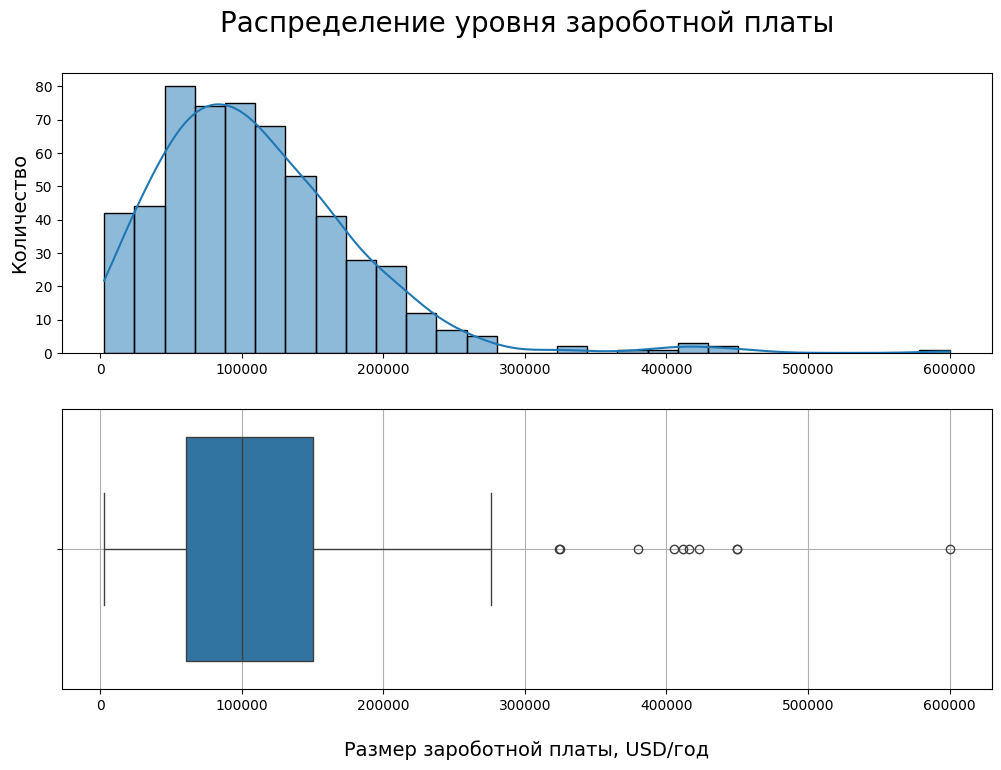

In [12]:
# Задаем настройки поля отображения
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.2)

# Строим гистограмму распределения зарплаты
salary_hist = sns.histplot(
    data=data_upd,
    x = 'salary_in_usd',
    kde = True,
    ax=axes[0]
    )

# Задаем подписи к графику
salary_hist.set_title('Распределение уровня зароботной платы''\n',
                      fontsize=20)
salary_hist.set_ylabel('Количество', fontsize = 14)
salary_hist.set_xlabel('')


# Строим коробчатую диаграмму распределения зарплаты
salary_box = sns.boxplot(
    data = data_upd,
    x = 'salary_in_usd',
    orient='h',
    ax=axes[1], 
    )

# Задаем подписи к графику
salary_box.set_xlabel(
    '\n''Размер зароботной платы, USD/год',
    fontsize = 14
    )
salary_box.grid()

fig.show('png')

В результате построения коробчатой диаграммы мы наблюдаем ряд выбросов по уровню зароботной платы. 
Произведем выгрузку этих строк, для более детального изучения и принятия решения по ним.

In [13]:
# вычисляем межвартильный размах
iqr = data_upd['salary_in_usd'].quantile(0.75) - \
    data_upd['salary_in_usd'].quantile(0.25)

# вычисляем правую границу выброса
mustashe_right = iqr*3 + data_upd['salary_in_usd'].min()

# выводим потенциальные выборосы на экран
display(
    data_upd[data_upd['salary_in_usd'] > mustashe_right]
    )

,work_year,experience_level,employment_type,job_field,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,2020,EX,FT,DS,325000,America,100,America,L
33,2020,MI,FT,DS,450000,America,0,America,M
63,2020,SE,FT,DS,412000,America,100,America,L
93,2021,SE,FT,DE,276000,America,0,America,L
97,2021,MI,FT,DA,450000,America,100,America,L
157,2021,MI,FT,DS,423000,America,50,America,L
225,2021,EX,CT,DS,416000,America,100,America,S
252,2021,EX,FT,DE,600000,America,100,America,L
482,2022,EX,FT,DE,324000,America,100,America,M
519,2022,SE,FT,DS,380000,America,100,America,L


В целом, по предствленным данным можно сделать вывод, что они правдивы. 
Единственное, что может иметь смысл в их удалении - это привод к нормальности распределения признака, т.к. по построенной гистограмме наблюдаются очертания нормальности. 

Немного забегая вперед, проведем статистический тест на нормальность Шапиро-Уилка на этом этапе, для принятия решения, т.к. формируется датасет с которым будут производиться все последующие действия. Проверку на нормальность распределения признака зарплаты произведем на **уже очищенных от предполагаемых выбросов данных**. 

In [14]:
# Создание копии DF для проверки, очистка его от выбросов 
data_drop_test = data_upd.copy()
index_to_drop = data_drop_test[
    data_drop_test['salary_in_usd'] > mustashe_right
    ].index
data_drop_test = data_drop_test.drop(labels=index_to_drop, axis=0)


# Проведение теста Шапиро-Уилка
_, p = stats.shapiro(data_drop_test['salary_in_usd'])
print('p-value = %.3f' % (p))

if p <= alpha:
    print('Рапсределение не нормальное')
else: 
    print('Распределение нормальное')

p-value = 0.000
Рапсределение не нормальное


По результатам проверок принято решение о **не удалении данных**. Выбросов не так много, и нельзя сказать, что это ошибочные данные. Даже сотрудник с заработной платой 600.000 USD может быть, т.к. имеет высокую квалификацию и занят в сфере Data Engineering. 
Просто, при будущем анализе будем иметь ввиду, что в нашем датасете имеются выбросы, и соответственно, **будем применять методы подходящие под данные с вероятными выбросами**. 

**Вывод по распределению значения заработных плат:**

Вывод аналогичен выводу, сделанному в результате описательной статистики числовых признаков. 
Медианная заработная плата равняется 100.000 USD / год. Половина наблюдений лежит в диапазоне 60.757 - 150.000 USD. Имеется 11 выбросов, которые решено оставить. 

Распределение признака ненормально. 

___
## Анализ категориальных признаков

Анализ категориальных признаков выполним следующим образом. 

Построим гистограммы распределения признаков на одной части графика (левой), а на второй (правой), построим распределение признаков в разрезе медианного уровня заработных плат. 

Это поможет дать нам предварительный ответ на вопрос о том, какие факторы влияют на уровень заработных плат в области Data Science. 

Предварительно, для удобства дальнейшего изучения, создадим копию DF, в котором произведем замену значений признаков на легко читаемые с ясным отражением смысла значения признака. 

In [15]:
# Создаем копию DF, прописываем функции изменения значений 
# признаков и применяем их /
data_easy_read = data_upd.copy()

# Признак квалификации сотрудников
def exprnc_refill(x):
    if x == 'EN':
        return 'Entry'
    if x == 'MI':
        return 'Middle'
    if x == 'SE':
        return 'Senior'
    if x == 'EX':
        return 'Executive'

data_easy_read['experience_level'] = \
    data_easy_read['experience_level'].apply(exprnc_refill)
    
# Признак типа трудоустройства
def empl_type_refill(x):
    if x == 'PT':
        return 'Partly'
    if x == 'FT':
        return 'Full-time'
    if x == 'CT':
        return 'Contract'
    if x == 'FL':
        return 'Freelance'
    
data_easy_read['employment_type'] = \
    data_easy_read['employment_type'].apply(empl_type_refill)
    
# Признак режимов работы сотрудников
def remote_ratio_refill(x):
    if x == 0:
        return 'In-office'
    if x == 50:
        return 'Hybrid'
    if x == 100:
        return 'Remote'
    
data_easy_read['remote_ratio'] = \
    data_easy_read['remote_ratio'].apply(remote_ratio_refill)

# Признак размера компании
def company_size_refill(x):
    if x == 'S':
        return '< 50 employees'
    if x == 'M':
        return '50 - 250 employees'
    if x == 'L':
        return '> 250 employees'
    
data_easy_read['company_size'] = \
    data_easy_read['company_size'].apply(company_size_refill)


На основе полученных преобразованных данных построим графики.
Построение графиков, для упрощения написания кода произведем при помощи циклов.

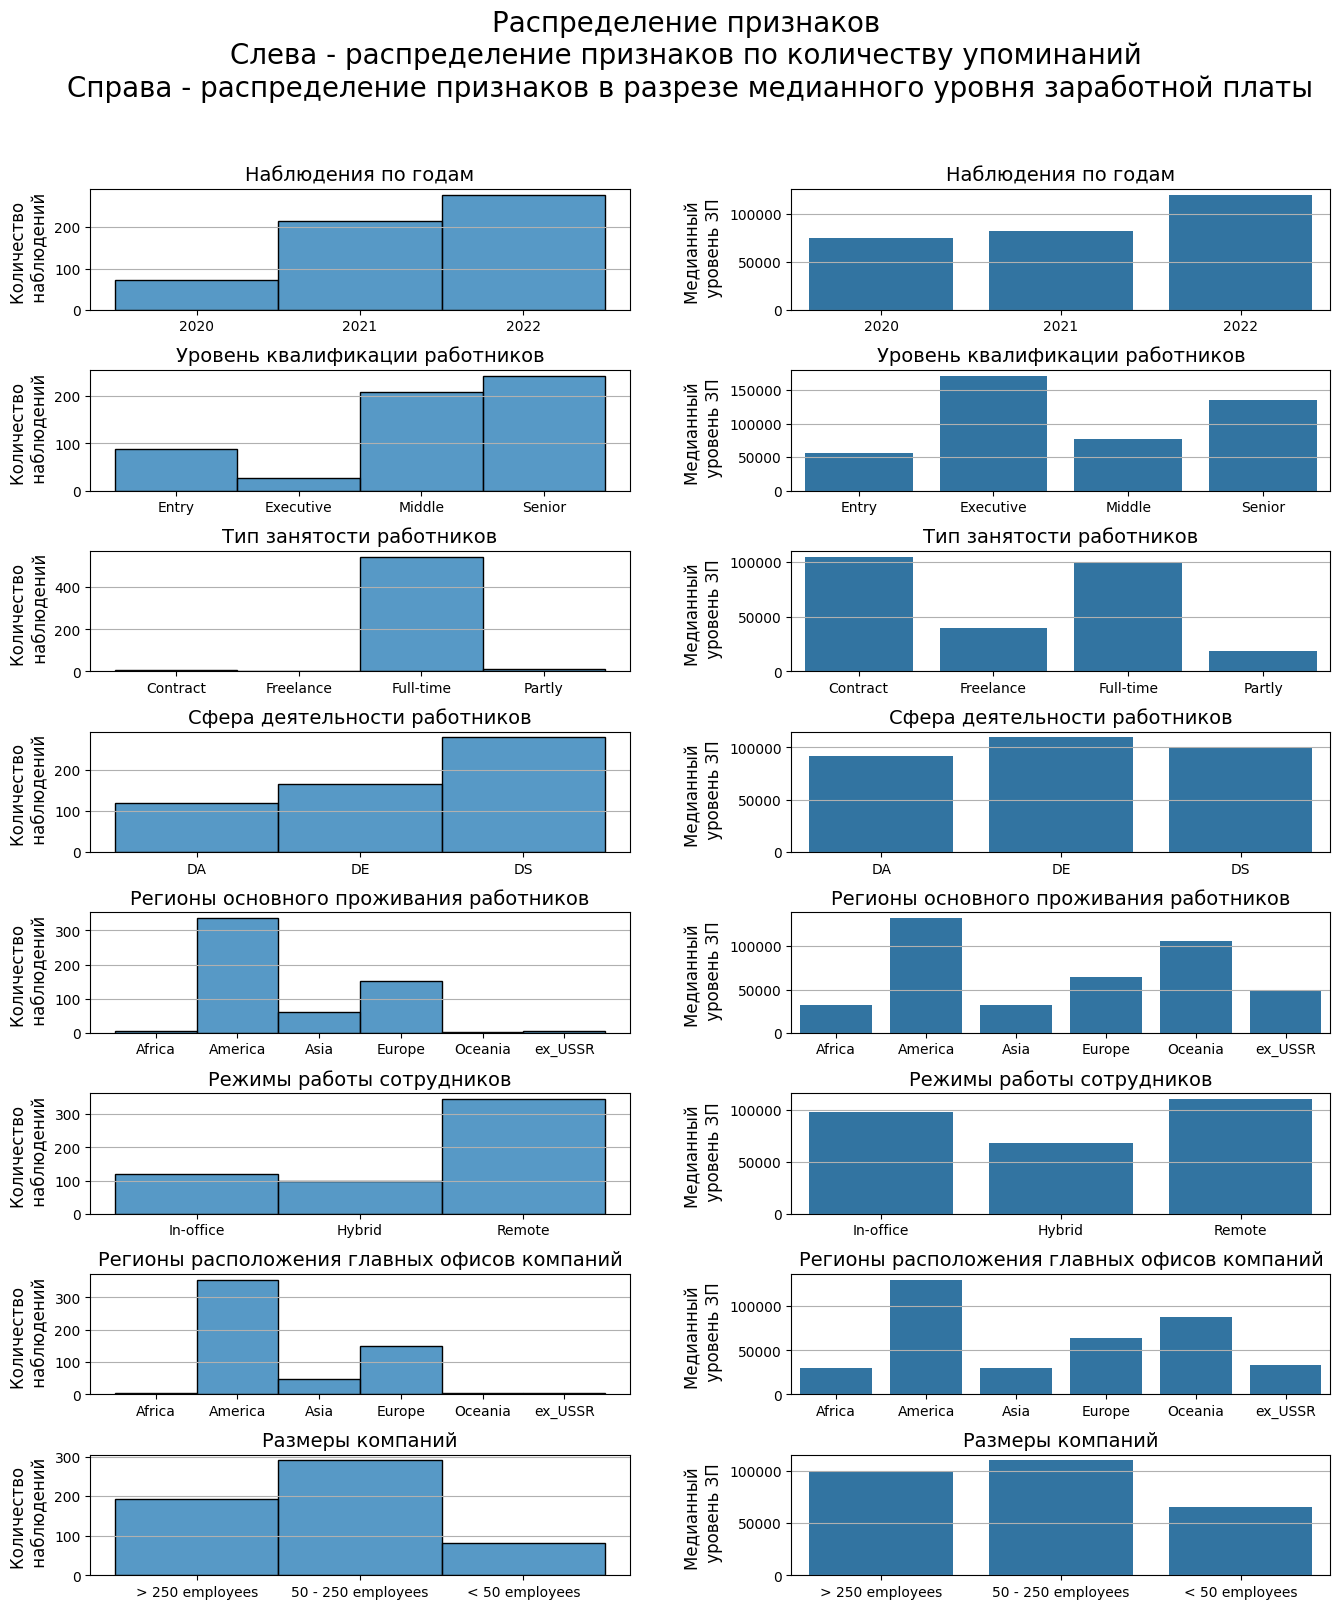

In [16]:
# Задаем настройки поля отображения
fig, axes = plt.subplots(nrows = 8, ncols = 2, figsize = (16, 18))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)

# Список, который будет импортироваться как названия графиков
title_list = ['Наблюдения по годам',
             'Уровень квалификации работников',
             'Тип занятости работников',
             'Сфера деятельности работников',
             'Регионы основного проживания работников',
             'Режимы работы сотрудников',
             'Регионы расположения главных офисов компаний',
             'Размеры компаний'
             ]

# Список названий колонок, по которым будут работать циклы
cols_list = list(data_upd.columns)
cols_list.remove('salary_in_usd')

# Счетчик для цикла создания гистограмм
counter_hist = 0

# Цикл создания гистограмм
for elem in cols_list:
    
    # Построение гистограммы признака
    hist = sns.histplot(
        data_easy_read,
        x='{}'.format(elem),
        ax=axes[counter_hist][0],
        )
    
    # Подписи и настройки отображения
    hist.set_xlabel('')
    hist.set_ylabel('Количество \n наблюдений', fontsize = 12)
    hist.set_title(f'{title_list[counter_hist]}', fontsize = 14)
    hist.grid(axis='y', which='major')
    
    # Для признака года пропишем, что будет выводиться на график
    if counter_hist == 0:
        hist.set_xticks([2020,2021,2022])
    
    counter_hist+=1


# Счетчик для цикла создания столбатых графиков
counter_bar = 0    

# Цикл создания столбатых графиков
for elem in cols_list:
    
    # Построение стобчатой диаграммы признака в разрезе ЗП
    bar = sns.barplot(
        data_easy_read,
        x=f'{elem}',
        y='salary_in_usd',
        estimator='median',
        ax=axes[counter_bar][1],
        errorbar=None
        )
    
    # Подписи и настройки отображения
    bar.set_xlabel('')
    bar.set_ylabel('Медианный \n уровень ЗП', fontsize = 12)
    bar.set_title(f'{title_list[counter_bar]}', fontsize = 14)
    bar.grid(axis='y')
   
    counter_bar+=1

# Название группы графиков
fig.suptitle('Распределение признаков \n'
             'Слева - распределение признаков по количеству упоминаний \n'
             'Справа - распределение признаков в разрезе медианного уровня '
             'заработной платы',
            fontsize = 20
            )

# Вывод на экран
plt.show('png')


**Выводы по полученным распределениям признаков:**

- Год
    
Наибольшее количество наблюдений относится к 2022 году. 

- Уровень квалификации сотрудников 
    
Большое количество наблюдений приходится на Middle и Senior специалистов. И разница в их количестве не велика. 

- Тип занятости сотрудников 
    
Подавляющее большинство наблюдений относится к полной занятости сотрудников. 

- Сфера деятельности сотрудников
    
Почти половина из всех наблюдений приходится на сотрудников, занятых в сфере Data Science. На втором месте Data Engineering, на третьем - Data Analysis. 

- Регионы основного проживания сотрудников 
    
С большим отрывом это Америка, больше половины наблюдений (более 300) приходится на этот регион. На втором месте Европа со 150 наблюдениями, и Азия с 50 наблюдениями. 

- Режимы работы сотрудников 
    
Наиболее часто встречается удаленный режим работы (более 300 наблюдений), офисный и гибридный режимы практически делят между собой второе и третье место по количество наблюдений. 

- Регионы расположения головных офисов компаний 
    
Распределение аналогично другому географическому признаку - региону проживания сотрудников. 

- Размеры компаний 
    
Почти 300 наблюдений относится к компаниям среднего размера, почти 200 наблюдений относится к большим компаниям, оставшееся количество к малым компаниям. 

**Выводы по распределениям признаков в разрезе уровня медианной заработной платы:**

**(Что влияет на уровень заработной платы)**

В целом, по распределению признаков можно сказать, что все признаки в какой-либо части, кроме сферы деятельности работников, влияет на уровень заработной платы. 

Почему в какой-либо части? Ответим по каждому признаку (сделаем важную оговорку, что речь здесь пойдет о визуальном анализе, на сколько наблюдаемая закономерность важна статистически будет рассмотрено далее): 

- Год

По 2020 и 2021 году уровень зарплат отличается незначительно, в 2022 году наблюдается рост зарплат. 

- Тип занятости сотрудника 

Из построенных распределений видно, что полная занятость приносит высокий доход. Так же видно, что контракт так же приносит высокий доход. Но, важно учитывать, сравнивая с просто распределением признака, что доля контрактов в выборке очень мала. 

- Сфера деятельности сотрудников 

Как сказано выше, распределение по данному признаку практически одинаково. 

- Регионы основного проживания сотрудников 

Лидером по зарплате является регион Америка, на втором месте страны Океании, но, опять же, количество наблюдений по данной группе очень мало. Далее идут страны Европы, страны бывшего СССР, страны Азии. 

- Режимы работы сотрудников 

При удаленном формате работы зарплата выше. Незначительно менее получают сотрудники, работающие в офисе. И, существенно ниже, получают сотрудники с гибридным форматом работы. 

- Регионы расположения головных офисов компаний 

Распределение аналогично распределению по основному проживания сотрудников. 

- Размеры компаний 

В средних и больших компаниях зарплаты схожи, в компаниях малого размера зарплаты почти в половину ниже зарплат в компаниях среднего размера. 


**Для ответов на следующие поставленные вопросы перейдем к следующиему разделу исследования.**

# Статистические тесты

Для начала напишем две функции, цель которых - проверка на нормальность распределения данных, определение возможности отклонения нулевой гипотезы в результате проведенного статистического теста. 

In [17]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}.'
            ' Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}.'
            ' Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}.'
    ' Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}.'
    ' У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Приступим к изучениею поставленных вопросов и дадим на них ответы.

___
### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

#### Проверка нормальности распределения

Проведем проверку на нормальность распределения значений признака зарплаты для каждого года. 

Воспользуемся методом Шапиро-Уилка. 

In [18]:
# Создадием объекты series со значениями признака зарплат по годам / 
data_2020 = data_upd.loc[data_upd['work_year'] == 2020, 'salary_in_usd']
data_2021 = data_upd.loc[data_upd['work_year'] == 2021, 'salary_in_usd']
data_2022 = data_upd.loc[data_upd['work_year'] == 2022, 'salary_in_usd']

# Прроведем тесты на нормальность, выведем полученные данные на экран /
print('Распределение заработных плат в 2020 году')
result = stats.shapiro(data_2020)
decision_normality(result[1])

print('\nРаспределение заработных плат в 2021 году')
result = stats.shapiro(data_2021)
decision_normality(result[1])

print('\nРаспределение заработных плат в 2022 году')
result = stats.shapiro(data_2022)
decision_normality(result[1])

Распределение заработных плат в 2020 году
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат в 2021 году
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат в 2022 году
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


#### Статистический тест

Так как вопрос стоит именно в динамике (увеличении зарплат), а в нашем датасете присутствует три года, произведем тесты на статистическую значимость год к году. 
Наши данные распределены не нормально, они не зависимы, две группы, итого, **воспользуемся методом Манна-Уитни.** 

**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза:* зарплата с годом не меняется, либо больше, чем в следующем году.
$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза:* Зарплата растет с годами. 
$$ H_1 : μ_1 < μ_2$$

In [19]:
# Проведем тесты
_, p = stats.mannwhitneyu(data_2021, data_2020, alternative='greater')
decision_hypothesis(p)

_, p = stats.mannwhitneyu(data_2022, data_2021, alternative='greater')
decision_hypothesis(p)

p-value = 0.249
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**

У нас нет оснований утверждать, что заработная плата в 2021 году выше, чем в 2020. 

Но, мы можем утверждать, что заработная плата в 2022 году выше, чем в 2021 (и, соответственно, в 2020).

___
### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

Первым этапом ответим на вопрос отличаются ли зарплаты специалистов. Если отличаются, вторым этапом ответим на вопрос в какую сторону.

#### Проверка нормальности распределения

Проведем проверку на нормальность распределения значений признака зарплаты для каждой сферы деятельности за 2022 год. 

Воспользуемся методом Шапиро-Уилка. 

In [20]:
# Создаем два объекта series с соответствующими данными
data_ds_salary = data_upd[data_upd['work_year'] == 2022]. \
    loc[data_upd['job_field'] == 'DS', 'salary_in_usd']

data_de_salary = data_upd[data_upd['work_year'] == 2022]. \
    loc[data_upd['job_field'] == 'DE', 'salary_in_usd']
    

# Тест на нормальность, вывод результатов
print('Распределение заработных плат в 2022 году для Data Scientists')
result = stats.shapiro(data_ds_salary)
decision_normality(result[1])

print('\nРаспределение заработных плат в 2022 году для Data Engineers')
result = stats.shapiro(data_de_salary)
decision_normality(result[1])

Распределение заработных плат в 2022 году для Data Scientists
p-value = 0.018
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат в 2022 году для Data Engineers
p-value = 0.013
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


#### Статистический тест

Имеем две группы, они независимы, распределены не нормально. **Воспользуемся методом Манна - Уитни.**


**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза*: размер заработных плат специалистов в области Data Science и Data engineering в 2022 год не отличается.

$$ H_0 : μ_1 = μ_2 $$

*Альтернативная гипотеза*: размер заработных плат специалистов в области Data Science и Data engineering в 2022 год отличается.

$$ H_1 : μ_1 \neq μ_2 $$

In [21]:
# Проведем тест
_, p = stats.mannwhitneyu(
    data_ds_salary, data_de_salary, alternative='two-sided'
    )
decision_hypothesis(p)

p-value = 0.787
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:**

У нас нет оснований утверждать, что заработная плата специалистов в области Data Science и Data Engineering отличается в 2022 году.

___

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

#### Проверка нормальности распределения

Проведем проверку на нормальность распределения значений признака зарплаты специалиста Data Scientist для каждого размера компаний. 

Воспользуемся методом Шапиро-Уилка. 

In [22]:
# Создадием объекты series со значениями признака зарплат по компаниям /
data_company_s = data_upd.loc[
    data_upd['company_size'] == 'S', 'salary_in_usd'
    ]
data_company_m = data_upd.loc[
    data_upd['company_size'] == 'M', 'salary_in_usd'
    ]
data_company_l = data_upd.loc[
    data_upd['company_size'] == 'L', 'salary_in_usd'
    ]


# Проведем тесты на нормальность, выведем полученные данные на экран /
print('Распределение заработных плат Data Scientist в S-компаниях')
result = stats.shapiro(data_company_s)
decision_normality(result[1])

print('\nРаспределение заработных плат Data Scientist в M-компаниях')
result = stats.shapiro(data_company_m)
decision_normality(result[1])

print('\nРаспределение заработных плат Data Scientist в L-компаниях')
result = stats.shapiro(data_company_l)
decision_normality(result[1])

Распределение заработных плат Data Scientist в S-компаниях
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат Data Scientist в M-компаниях
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат Data Scientist в L-компаниях
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


#### Статистический тест

Имеем три группы, они независимы, распределены не нормально. **Воспользуемся методом Краскелла-Уоллиса**


**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза*: размер заработных плат специалистов Data Scientist одинаков в компаниях разного размера.

$$ H_0 : μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза*: размер заработных плат специалистов Data Scientist различается в компаниях разного размера.

$$ H_1 : μ_1 \neq μ_2 \neq μ_2 $$

In [23]:
# Проведем тест
_, p = stats.kruskal(
    data_company_s, data_company_m, data_company_l
    )
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Промежуточный вывод по вопросу:**

Мы получили результат, что зарплаты отличаются в зависимости от размеров компании. 

Соответственно, чтобы полностью ответить на вопрос, произведем сравнение трех выборок попарно. 

Для начала произведем сравнение для ответа на вопрос о схожести / не схожести зарплат в компаниях. 

Имеем две группы, они независимы, распределены не нормально. **Воспользуемся методом Манна - Уитни**


**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза*: размер заработных плат специалистов Data Scientist одинаков в компаниях разного размера.

$$ H_0 : μ_1 = μ_2 $$

*Альтернативная гипотеза*: размер заработных плат специалистов Data Scientist различается в компаниях разного размера.

$$ H_1 : μ_1 \neq μ_2 $$

In [24]:
# Проведем тесты
print('Сравнение зарплат в компаниях размера M и S')
_, p = stats.mannwhitneyu(data_company_m, data_company_s)
decision_hypothesis(p)

print('\nСравнение зарплат в компаниях размера L и S')
_, p = stats.mannwhitneyu(data_company_l, data_company_s)
decision_hypothesis(p)

print('\nСравнение зарплат в компаниях размера L и M')
_, p = stats.mannwhitneyu(data_company_l, data_company_m)
decision_hypothesis(p)

Сравнение зарплат в компаниях размера M и S
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.

Сравнение зарплат в компаниях размера L и S
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.

Сравнение зарплат в компаниях размера L и M
p-value = 0.317
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Мы выяснили, что зарплаты в компаниях **M / S** и в **L / S** не равны, разберемся подробнее. 

Сделаем еще один тест. Сравним зарплаты в компаниях **M / S**. Вывод будет пременим так же и для сравнения **L / S**, т.к. зарплаты в L и M равны. 

**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза*: размер заработных плат специалистов Data Scientist в компаниях размера **S** больше или равен зараплате специалистов в компаниях **M**.

$$ H_0 : μ_1 >= μ_2 $$

*Альтернативная гипотеза*: размер заработных плат специалистов Data Scientist в компаниях размера **S** меньше зараплате специалистов в компаниях **M**.

$$ H_1 : μ_1 < μ_2 $$

In [25]:
# Проведем тест
print('Сравнение зарплат в компаниях размера M и S')
_, p = stats.mannwhitneyu(
    data_company_m, data_company_s, alternative='greater'
    )
decision_hypothesis(p)

Сравнение зарплат в компаниях размера M и S
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**

У нас нет оснований утверждать, что заработные платы в компаниях размера **L** и **M** различаются. 

Но, мы можем утверждать, что зарплаты в компаниях размера **S** меньше, чем в средних и больших компаниях.


___
# Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Данные признаки, анализ которых нам необходимо произвести, являются категориальными. Нам необходима **таблица сопряженности** признаков.

Стоит учитывать, что количественные значения (сумма) по признакам нам не подойдут. Очевидно, что при больших значениях одной из сфер деятельности, взаимосвязь будет выявлена.

Поэтому, нам требуется преобразовать данные, **произвести шкалирование**. 

При создании таблицы сопряженности произведем нормализацию по индексу (по сфере деятельности), чтобы понять именно процентные соотношения распредлений внутри группы сферы деятельности. 

In [26]:
# Создадим таблицу сопряженности для признаков и выведем на экран
field_size_df = pd.crosstab(
    index=data_upd[data_upd['job_field'] != 'DA']['job_field'],
    columns=data_upd['company_size'],
    normalize='index'
    ).round(2)

display(field_size_df)

company_size,L,M,S
job_field,,,
DE,0.33,0.58,0.09
DS,0.38,0.42,0.20


#### Статистический тест

Для исследования зависимости воспользуемся критерием Хи-Квадрат, т.к. имеем две группы из одной выборки, данные категориальные. 

**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза*: между сферой деятельности и размером компании нет взаимосвязи. Признаки независимы.

*Альтернативная гипотеза*: между сферой деятельности и размером компании есть взаимосвязь. Признаки зависимы.

In [27]:
# Проведем тест
_, p, _, _ = stats.chi2_contingency(field_size_df)
decision_hypothesis(p)

p-value = 0.965
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:**

Взаимосвязи между наличием должностей Data Scientist и Data Engineer и размером компании **не выявлено**. 
___

___
# Взаимосвязи признаков датасета

Ответив на основные поставленные вопросы, приступим к дополнительному изучению датасета в поисках взаимосвязей различных признаков. Возможно, будут найдены какие-то новые закономерности, либо ранее найденные закономерности будут переосмыслены.

### Кодирование и матрица корреляции

Для оценки влияния признаков друг на друга, применим матрицу корреляции. 

Т.к. почти все признаки наших данных являются категориальными, необходимо применить кодирование признаков.
 
Порядковому кодированию будут подвергнуты признаки опыта сотрудников и размер компании. Остальные признаки будут обработаны при помощи однократного кодирования.

C:\Users\nitys\AppData\Roaming\Python\Python312\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\nitys\AppData\Roaming\Python\Python312\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\nitys\AppData\Roaming\Python\Python312\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtyp

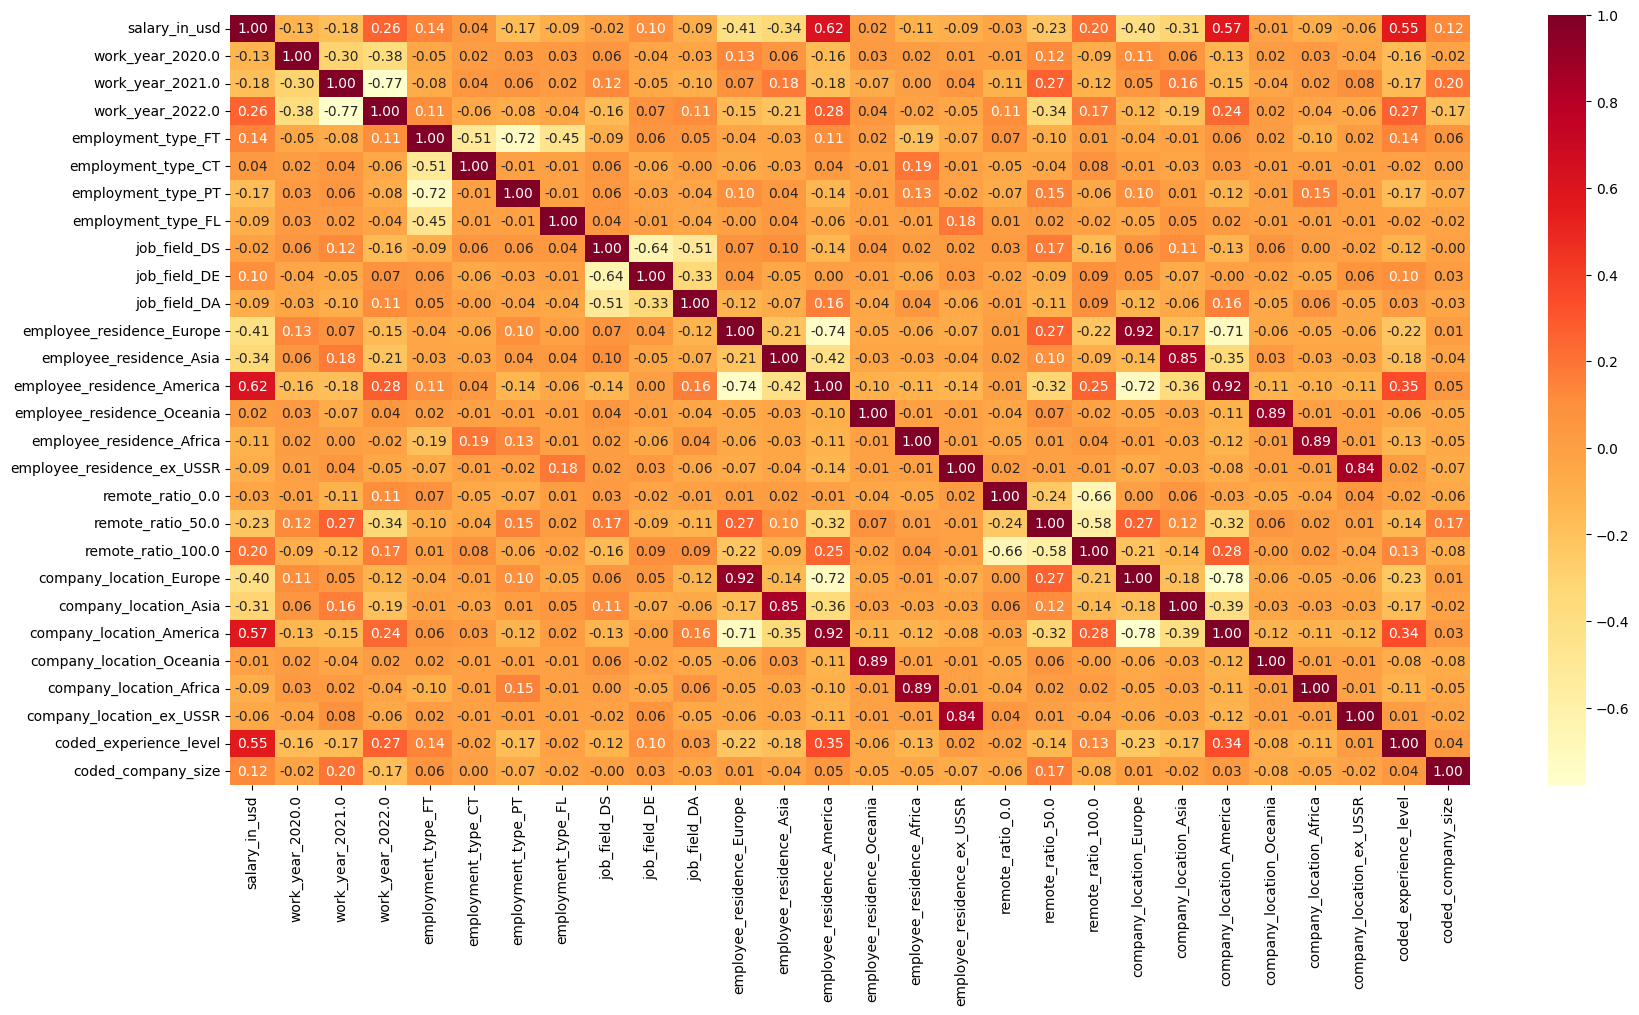

In [28]:
# Создадим новый DF, который будет по итогу представлять 
# только закодированные признаки (кроме числового - зарплата) /
data_encodered = data_upd.copy()

# Список для однократного кодирования
onehot_enc_list = ['work_year', 'employment_type', 
                   'job_field', 'employee_residence', 
                   'remote_ratio', 'company_location',]

# Список для порядкового кодирования и ключи кодирования
ordinal_enc_list = ['experience_level', 'company_size']
mapping_exp = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
mapping_size = {'S': 1, 'M': 2, 'L': 3}


# Цикл для однократного кодирования. Исходный признак удаляется. 
for elem in onehot_enc_list:
    encoder = ce.OneHotEncoder(cols=f'{elem}',
                               use_cat_names=True)
    data_bin = encoder.fit_transform(data_encodered[f'{elem}'])
    
    data_encodered = pd.concat([data_encodered, data_bin], axis=1)
    
    data_encodered = data_encodered.drop(f'{elem}', axis=1)


# Цикл для порядкого кодирования. Исходный признак удаляется. 
for elem in ordinal_enc_list:
    
    # Для привязки верного словаря кодирования задаем условия
    if elem == ordinal_enc_list[0]:
        encoder = ce.OrdinalEncoder(mapping=[{
            'col' : f'{elem}',
            'mapping' : mapping_exp 
            }])
    else:
        encoder = ce.OrdinalEncoder(mapping=[{
            'col' : f'{elem}',
            'mapping' : mapping_size 
            }])

    data_bin = encoder.fit_transform(data_encodered[[f'{elem}']])
    data_bin = pd.DataFrame(data_bin)
    
    data_bin = data_bin.rename(
        columns={ f'{elem}' : 'coded_' f'{elem}' }
        )
    
    data_encodered = pd.concat([data_encodered, data_bin], axis=1)
    data_encodered = data_encodered.drop(f'{elem}', axis=1)


# Визуализация взаимосвязи путем создания матрицы корреляции 
# При корреляции используем метод спирмена, т.к. имеем выбросы в 
# данных по зароботной плате /
fig = plt.subplots(figsize=(20,10))
fig = sns.heatmap(
    data_encodered.corr(
        method = 'spearman'), 
        annot=True,
        cmap='YlOrRd',
        fmt='.2f'
        )

plt.show('png')

___
**Благодаря построенной матрице корреляции мы можем сделать ряд наблюдений, которые изучим более детально**

Сразу стоит оговориться, что в данном анализе будут отступления от усредненных значений коэффициентов корреляций в части силы корреляции. По большинству признаков коэффициенты корреляции низки, однако, мы можем сравнить коэффициенты корреляции «внутри» одной группы признаков (как, например, режим работы сотрудника). 

Итак, что первое бросается в глаза, так это **высокий уровень корреляции у географических признаков**: локация компании, резидентство сотрудника. Мы можем сделать предположение, что преимущественно, локация компании совпадает с резидентством сотрудника. Выделяются регионы бывшего СССР, Азии с более низким коэффициентом корреляции, что при детальном анализе может быть объяснено работой в компаниях Америки и Европы, что так же объяснит нам, почему на пересечении этих признаков (локация компании, локация сотрудника Америка / Европа) коэффициент не единица. **Далее исследуем данную зависимость.**

Далее будут приведены выводы в формате признак – краткое наблюдение. 

**Года**

Матрица корреляции отображает ранее сделанный вывод о том, что в 2020 и 2021 год статичестической значимости роста в зарплате не было, но в 2022 году зарплата выросла. 

**Тип занятости**

Общие коэффициенты низки, и тяжело сделать конкретный вывод. Но, что можно сказать точно, что такой тип занятости как фриланс и частичная занятость приносят более низкие доходы в данной сфере, т.к. относительно других значений признаков, их зависимость отрицательная. 

**Сфера деятельности**

Опираясь на матрицу корреляции можно сказать, что специалисты в области Data Engineering имеют более высокие доходы. Хотя, ранее, сравнивания зарплаты DS и DE за 2022 год мы пришли к другому выводу. Таким образом, проведем сравнение зарплат DA и DE.

**Режим работы сотрудников**

Наиболее высокие ЗП наблюдаются при удаленном формате работы, далее, офисный и гибридный. Возможно, это связано с тем, что на удаленном формате работы заняты преимущественно сотрудники с более высокой квалификацией.

Наблюдается слабая связь признака гибридного режима работы с признаком года. **Далее исследуем данную зависимость.** 

**Регион нахождения головного офиса компании** 

Наблюдается средняя связь между признаком со значением Америки и уровнем заработных плат. Что подсказывает нам, что Америка является лидером по уровню ЗП. Интересна обратная связь уровня ЗП с признаком Европы, он отрицателен. Возможно, этот показатель объясняется большой разницей с зарплатами в Америке. 

Так же наблюдается, скажем, с натяжкой, слабая связь признака со значением "Европа" и режимом работы сотрудников "Гибиридный". **Построим график, визуализирующий это распределение.** 

**Регион резидентства сотрудников** 

Лидером так же является Америка. Все распределение, что логично, соответствует распределению региона нахождения головного офиса компании. В целом, один из признаков, в случае создания модели, подлежит удалению, очевидно, они мультикоррелиальны. 

**Квалификация сотрудников** 

Признак имеет среднюю корреляцию с уровнем ЗП, следовательно, оказывает влияние на уровень ЗП. 

Так же признак имеет слабую связь с географическими признаками - локация компании и работника Америка. **Построим график, визуализирующий это распределение.** 

Почему важно заострить на этом внимание? Потому что, судя по всему, Америка является лидером по уровню ЗП, но, есть вероятность, что объяснение этому является то, что уровень квалификации представленных работников в этом регионе выше. Надо это проверить.

**Размер компании** 

Коэффициент корреляции говорит нам о том, что признак имеет очень слабую связь с уровнем ЗП.
Разберемся с этим в дальнейшем более детально.

___
#### Есть ли связь регионов компаний и регионов проживания работников

Для ответа на этот вопрос сравним соответствующие признаки. 

Для начала создадим таблицу сопряженности.

In [29]:
# Создаем таблицу сопряженности
regions_df = pd.crosstab(
    index=data_upd['company_location'],
    columns=data_upd['employee_residence']
    )

##### Проведем статистический тест. 

В качестве теста выберем критерий хи-квадрат. 

Сформуриуем гипотезы: 

*Нулевая гипотеза:* между признаками региона головного офиса компании и региона резидентства работника **нет взаимосвязи**.

*Альтернативная гипотеза:* между признаками региона головного офиса компании и региона резидентства работника **есть взаимосвязь**. 

In [30]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(regions_df)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:** 

Как мы видим, взаимосвязь между регионом резиденства сотрудника и регионом головного офиса компании есть.

Для наглядности разбора данного аспекта произведем визуализацию распределения, демонстрирующую процент сотрудников, которые работают в компаниях своего резидентства. 

C:\Users\nitys\AppData\Local\Temp\ipykernel_20204\3728094532.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data_country = pd.pivot_table(


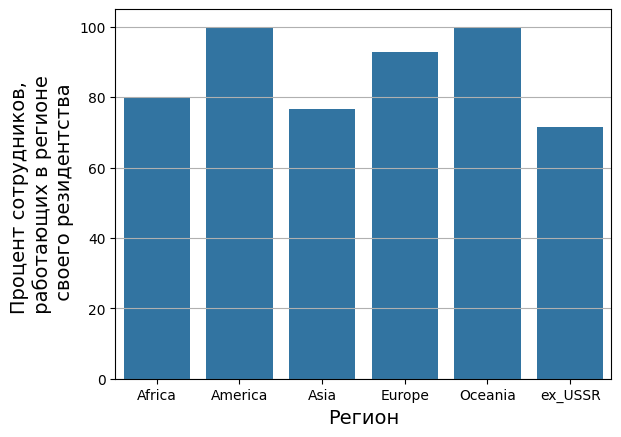

In [31]:
# Создаем сводну таблицк по географическим признакам, 
# в качестве values выбрали просто один из признаков, 
# т.к. будем применять агрегирующую функцию счета / 
data_country = pd.pivot_table(
    data_upd,
    columns='company_location',
    index = 'employee_residence',
    values='company_size',
    aggfunc='count'
    )

# Словарь, в него в ходе цикла будут вкладываться 
# ключ - регион, значение - процент сотрудников, работающих 
# в регионе своего резидентства /
company_empl_equal_dict = {}

# Список регионов, используем далее в цикле
country_list = list(data_country.index)

# В цикле произведем расчет процента сотрудников, которые 
# работают в компаниях аналогичего с собой резидентства 
# Произведем деление значения "страна-страна", т.е. совпадания 
# резиденств на общее число сотрудников резиденства исследуемой страны /
for country in country_list:
    ratio = data_country.loc[f'{country}', f'{country}'] / \
        sum(data_country.loc[f'{country}'])*100
    ratio = round(ratio, 2)
    
    employees = sum(data_country.loc[f'{country}'])
    
    company_empl_equal_dict.update({f'{country}' : ratio})
    

# На основе словаря company_empl_equal_dict создаем DF
company_empl_equal_df = pd.DataFrame.from_dict(
    company_empl_equal_dict, 
    orient='index'
    )
company_empl_equal_df = company_empl_equal_df.reset_index()
company_empl_equal_df = company_empl_equal_df.rename(
    columns={'index': 'Region', 0:'Ratio'}
    )

# Визуализация созданного DF
fig = sns.barplot(company_empl_equal_df, x='Region', y='Ratio')

fig.set_ylabel(
    'Процент сотрудников, \n работающих в регионе \n своего резидентства',
    fontsize = 14
    )
fig.set_xlabel('Регион', fontsize = 14)
fig.grid(axis='y')

plt.show('png')

**Вывод:**

Из построенного распределение мы видим очень важную особенность: если не все, то почти все сотрудники резидентства Америки работают в компаниях своего региона. 

Подобная картина в странах Океании, но, как мы узнали ранее количество наблюдений по данному региону очень мало. 

В странах Европы более 90 процентов резидентов работают в компаниях Европы. 

Что касается стран Африки, Азии, бывшего СССР, то более 20 процентов сотрудников работают в компаниях отличных от своего резидентства.

___
#### Влияет ли сфера деятельности на доход?

Изучим как соотносятся зарплаты разных сфер деятельности друг к другу по всей выборке (за все года).

In [32]:
# Создаем объекты series с соответствующими данными

data_da_salary = data_upd.loc[
    data_upd['job_field'] == 'DA', 'salary_in_usd'
    ]
data_ds_salary = data_upd.loc[
    data_upd['job_field'] == 'DS', 'salary_in_usd'
    ]
data_de_salary = data_upd.loc[
    data_upd['job_field'] == 'DE', 'salary_in_usd'
    ]

# Проверим нормально ли распределение значений
print('Распределение заработных плат для Data Analytics')
result = stats.shapiro(data_da_salary)
decision_normality(result[1])

print('\nРаспределение заработных плат для Data Scientists')
result = stats.shapiro(data_ds_salary)
decision_normality(result[1])

print('\nРаспределение заработных плат для Data Engineers')
result = stats.shapiro(data_de_salary)
decision_normality(result[1])

Распределение заработных плат для Data Analytics
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат для Data Scientists
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат для Data Engineers
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


Сравним попарно группы. 

Имеем две группы, они независимы, распределены не нормально. **Воспользуемся методом Манна - Уитни**


**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза*: размер заработных плат специалистов одной сферы равен или меньше зарплаты в другой сфере.

$$ H_0 : μ_1 <= μ_2 $$

*Альтернативная гипотеза*: размер заработных плат специалистов одной сферы больше, чем другой.

$$ H_1 : μ_1 > μ_2 $$

In [33]:
print('\nСравнение зарплат в сферах DE и DA')
_, p = stats.mannwhitneyu(data_de_salary, data_da_salary, alternative='greater')
decision_hypothesis(p)

print('\nСравнение зарплат в компаниях размера DS и DA')
_, p = stats.mannwhitneyu(data_ds_salary, data_da_salary, alternative='greater')
decision_hypothesis(p)

print('\nСравнение зарплат в компаниях размера DE и DS')
_, p = stats.mannwhitneyu(data_de_salary, data_ds_salary, alternative='greater')
decision_hypothesis(p)


Сравнение зарплат в сферах DE и DA
p-value = 0.003
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.

Сравнение зарплат в компаниях размера DS и DA
p-value = 0.093
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Сравнение зарплат в компаниях размера DE и DS
p-value = 0.050
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:**

Мы не можем утверждать, что статистически зарплата специалистов DS больше, чем специлистов DA, но можем сказать, что статистически зарплата специалистов DE больше, чем зарплата специалистов DA.

___

#### Влияет ли тип занятости на уровень дохода

Произведем проверку влияния типа занятости на уровень дохода. 

In [34]:
# Создаем объекты series по каждому типу занятости и уровню зарплаты
data_fulltime = data_upd.loc[
    data_upd['employment_type'] == 'FT', 'salary_in_usd'
    ]
data_parttime = data_upd.loc[
    data_upd['employment_type'] == 'PT', 'salary_in_usd'
    ]
data_contract = data_upd.loc[
    data_upd['employment_type'] == 'CT', 'salary_in_usd'
    ]
data_freelance = data_upd.loc[
    data_upd['employment_type'] == 'FL', 'salary_in_usd'
    ]

# Прроведем тесты на нормальность, выведем полученные данные на экран /
print('Распределение заработных плат типа занятости "полная занятость"')
result = stats.shapiro(data_fulltime)
decision_normality(result[1])

print('\nРаспределение заработных плат типа занятости "частичная занятость"')
result = stats.shapiro(data_parttime)
decision_normality(result[1])

print('\nРаспределение заработных плат типа занятости "контракт"')
result = stats.shapiro(data_contract)
decision_normality(result[1])

print('\nРаспределение заработных плат типа занятости "фриланс"')
result = stats.shapiro(data_freelance)
decision_normality(result[1])

Распределение заработных плат типа занятости "полная занятость"
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат типа занятости "частичная занятость"
p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат типа занятости "контракт"
p-value = 0.406
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

Распределение заработных плат типа занятости "фриланс"
p-value = 0.507
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


Для групп с нормальным распределение признака дополнительно проведем тест на равенство дисперсий, для корректного параметра статистистического теста далее.

In [35]:
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_contract, data_freelance)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

Тест на равенство дисперсий
p-value = 0.275
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.


Сравним уровни зарплат групп парно. Одна группа - "Полная занятость" и "Частичная занятость", вторая группа - "Контракт" и "Фриланс".

#### Статистический тест: сравнение зарплат при типах занятости "Полная занятость" и "Частичная занятость"

Имеем две группы, они независимы, распределены не нормально. **Воспользуемся методом Манна - Уитни.**


**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза*: размер заработных плат специалистов с типом занятости "Полная занятость" и "Частичная занятость" **равны.**

$$ H_0 : μ_1 = μ_2 $$

*Альтернативная гипотеза*: размер заработных плат специалистов с типом занятости "Полная занятость" и "Частичная занятость" **не равны.**

$$ H_1 : μ_1 \neq μ_2 $$

In [36]:
_, p = stats.mannwhitneyu(data_fulltime, data_parttime)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Статистический тест показал нам, что зарплаты при полной и частичной занятостях не равны. 

Определим как они соотносятся друг к другу. 


**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза*: размер заработных плат специалистов с типом занятости "Полная занятость" меньше или равен заработным платам специалистов с типом занятости "Частичная занятость".

$$ H_0 : μ_1 <= μ_2 $$

*Альтернативная гипотеза*: размер заработных плат специалистов с типом занятости "Полная занятость" больше, чем у специалистов с типом занятости "Частичная занятость".

$$ H_1 : μ_1 > μ_2 $$

In [37]:
_, p = stats.mannwhitneyu(
    data_fulltime, data_parttime, alternative='greater'
    )
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**

Уровень заработных плат специалистов с полным типом занятости статистически больше, чем у специалистов с частичной занятостью. 

#### Статистический тест: сравнение средних зарплат при типах занятости "Контракт" и "Фриланс"

Имеем две группы, они независимы, распределены нормально, дисперсии равны. **Воспользуемся двухвыборочным t-критерием**


**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза*: размер заработных плат специалистов с типом занятости "контракт" и "фриланс" **равны.**

$$ H_0 : μ_1 = μ_2 $$

*Альтернативная гипотеза*: размер заработных плат специалистов с типом занятости "контракт" и "фриланс" **не равны.**

$$ H_1 : μ_1 \neq μ_2 $$

In [38]:
# Проведем тест
_, p = stats.ttest_ind(
    data_contract, data_freelance, equal_var=True
    )
decision_hypothesis(p)

p-value = 0.136
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:**

Не смотря на построенные ранее графики распределения зарплат, мы видели, что зарпалата у специалистов, работающих по контракту в разы больше, чем у фриланс сотрудников, статистической значимости не выявлено. Возможно, причиной этому послужил маленький размер выборки. Поэтому, данный вывод оставим за скобками, и не будет на него опираться. 

___
#### Есть ли связь между годами и режимами работы сотрудников

Изначально построим тепловую карту для визуализации распределения признака режима работы во временном разрезе

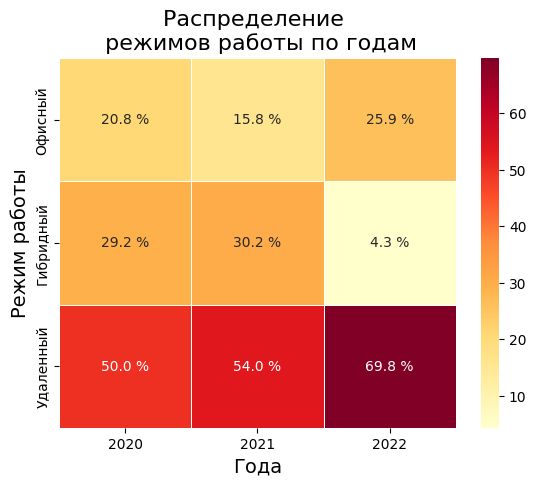

In [39]:
# Строим таблицу сопряженности для признаков режима работы 
# и года. Нормализуем данные по признаку года; 
# Преобразуем таблицу в DF; 
# Преобразуем значения в шкалу 0..100 /
data_remote_rat_year = pd.crosstab(
    index=data_upd['remote_ratio'],
    columns=data_upd['work_year'],
    normalize='columns'
)
data_remote_rat_year = pd.DataFrame(data_remote_rat_year)
data_remote_rat_year = data_remote_rat_year.apply(lambda x: x*100)


# Визуализируем полученный DF, делаем необходимые подписи,
# добавляем знак процента к значениям /
fig = sns.heatmap(
    data_remote_rat_year, 
    annot=True, 
    linewidth=.5, 
    fmt='.1f', 
    cmap="YlOrRd"
    )

fig.set_xlabel('Года', fontsize = 14)
fig.set_ylabel('Режим работы', fontsize = 14)
fig.set_yticklabels(['Офисный', 'Гибридный', 'Удаленный'])
for t in fig.texts: t.set_text(t.get_text() + " %")

plt.title('Распределение \n режимов работы по годам', fontsize = 16)

plt.show('png')

Мы видим, что значения по годам в разных режимах работы разнятся. Для подтверждение этого проведем статистический тест о понимании значимости данной закономерности.

#### Статистический тест 

В качестве данных возьмем распределение режимов работы по 2020 и 2022 году.

Мы имеем категориальные признаки, воспользуемся **критерием хи-квадрарт.** 

**Сформулируем гипотезы:**

*Нулевая гипотеза:* Связи между режимами работы и годами **нет.** 

*Альтернативная гипотеза:* Связь между режимами работы и годами **есть.** 

In [40]:
# проводим тест
# В качестве данных используем "переверную" таблицу, 
# индексы (категории) будут года, срез - вся таблица с шагом 2 /
_, p, _, _ = stats.chi2_contingency(data_remote_rat_year.T.iloc[::2])
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**

Благодаря тесту мы можем утверждать, что между годами и режимами работы есть взаимосвязь.

Из построенной тепловой карты мы видим, что распространённость удаленного формата работы с годами растет, так же как и офисного. Гибридный же формат работы в 2022 году получил резкое сокращение.

Имеется предположение, что данную картину объясняет пандемия COVID-19. Интересно было бы получить аналогичные данные по 2019 году для сравнения. Предположение заключается в том, что гибридный и удаленный формат работы получили распространение в результате ограничительных мер. В 2022 году, когда пандемия официально закончилась, произошло перераспределение сотрудников из гибридного режима на обратно в офисный формат, и в удаленный формат, т.к. он себя проявил с хорошей стороны.  

___
### Исследование связи режима работы и зарплаты

В данном блоке определим, имеется ли статистическая значимость влияния режима работы и получаемой зарплаты. 

Для начала сравним группы между собой, и, если подтвердится их неравенство, исследуем их отношение друг к другу. 

In [41]:
# Создаем Series по каждому режиму работы
data_office = data_upd.loc[
    data_upd['remote_ratio'] == 0, 'salary_in_usd'
    ]
data_hybrid = data_upd.loc[
    data_upd['remote_ratio'] == 50, 'salary_in_usd'
    ]
data_remote = data_upd.loc[
    data_upd['remote_ratio'] == 100, 'salary_in_usd'
    ]

# Проводим проверку на нормальность, выводим результат
print('Распределение заработных плат режима работы "офисный"')
result = stats.shapiro(data_office)
decision_normality(result[1])

print('\nРаспределение заработных плат режима работы "гибридный"')
result = stats.shapiro(data_hybrid)
decision_normality(result[1])

print('\nРаспределение заработных плат режима работы "удаленный"')
result = stats.shapiro(data_remote)
decision_normality(result[1])

Распределение заработных плат режима работы "офисный"
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат режима работы "гибридный"
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат режима работы "удаленный"
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


#### Статистический тест для проверки равности зарплат при различных режимах работы

Для трех независимых групп не нормально распределенных данных для их сравнения используем критерий Краскела-Уоллиса.

**Сформируем гипотезы:**

*Нулевая гипотеза:* медианы зарплат при офисном, гибридном и удаленном режимах работы **равны.** 
$$ H_0: m_1 = m_2 = m_3 $$

*Альтернативная гипотеза:* медианы зарплат при офисном, гибридном и удаленном режимах работы **не равны.** 
$$ H_0: m_1 \neq m_2 \neq m_3 $$


In [42]:
# Проводим тест
_, p = stats.kruskal(data_office, data_hybrid, data_remote)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


#### Статистический тест для проверки соотношения зарплат удаленного и офисного режима работы

Для двух независимых групп не нормально распределенных данных для их сравнения используем критерий Манна-Уитни .

**Сформируем гипотезы:**

*Нулевая гипотеза:* зарплата специалистов с удаленным режимом работы **меньше или равна** зарплате специалистов с офисным режимом работы.  
$$ H_0: μ_1 <= μ_2 $$

*Альтернативная гипотеза:* зарплата специалистов с удаленным режимом работы **больше** зарплаты специалистов с офисным режимом работы.
$$ H_0: μ_1 > μ_2 $$


In [43]:
# Проводим тест
_, p = stats.mannwhitneyu(
    data_remote, data_office, 
    alternative='greater'
    )
decision_hypothesis(p)

p-value = 0.018
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


#### Статистический тест для проверки соотношения зарплат офисного и гибридного режима работы

Для двух независимых групп не нормально распределенных данных для их сравнения используем критерий Манна-Уитни .

**Сформируем гипотезы:**

*Нулевая гипотеза:* зарплата специалистов с офсиным режимом работы **меньше или равна** зарплате специалистов с гибридным режимом работы.  
$$ H_0: μ_1 <= μ_2 $$

*Альтернативная гипотеза:* зарплата специалистов с офсиным режимом работы **больше** зарплаты специалистов с гибридным режимом работы.
$$ H_0: μ_1 > μ_2 $$

In [44]:
# Проводим тест
_, p = stats.mannwhitneyu(
    data_office, data_hybrid, 
    alternative='greater'
    )
decision_hypothesis(p)

p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**

В данном блоке исследования мы подтвердили статистическую значимость зависимости, определенной на этапе построения гистограмм распределения признаков в разрезе медианных значений зарпалат. 

Больше всех получают специалисты занятые удаленно, далее специалисты с офисным режимом работы, и, меньше получают специалисты с гибридным режимом работы. 

___
#### Влияет ли квалификация сотрудника на зарплату 

В данном блоке изучим как влияет уровень квалификации на зарплату сотрудников

In [45]:
# Создаем Series с зарплатами по каждой квалификации
data_executive = data_upd.loc[
    data_upd['experience_level'] == 'EX', 'salary_in_usd'
    ]
data_senior = data_upd.loc[
    data_upd['experience_level'] == 'SE', 'salary_in_usd'
    ]
data_middle = data_upd.loc[
    data_upd['experience_level'] == 'MI', 'salary_in_usd'
    ]
data_entry = data_upd.loc[
    data_upd['experience_level'] == 'EN', 'salary_in_usd'
    ]

# Проводим проверку на нормальность, выводим результат
print('Распределение заработных плат квалификации "Executive"')
result = stats.shapiro(data_executive)
decision_normality(result[1])

print('\nРаспределение заработных плат квалификации "Senior"')
result = stats.shapiro(data_senior)
decision_normality(result[1])

print('\nРаспределение заработных плат квалификации "Middle"')
result = stats.shapiro(data_middle)
decision_normality(result[1])

print('\nРаспределение заработных плат квалификации "Entry"')
result = stats.shapiro(data_entry)
decision_normality(result[1])

Распределение заработных плат квалификации "Executive"
p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат квалификации "Senior"
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат квалификации "Middle"
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат квалификации "Entry"
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


Предположим, что уровень зарплат зависит от квалификации и распределен соответственно. 

Проведем ряд однотипных тестов, сравнивая между собой "соседние" по квалификации группы. Для теста используем критерий Манна-Уитни. 

Сформулируем общие гипотезы. 

*Нулевая гипотеза:* Зарплата в группе высокой квалификации меньше или равна зарплате в группе квалификации ниже. 
$$ H_0: μ_1 <= μ_2 $$

*Альтернативная гипотеза:* Зарплата в группе высокой квалификации больше, чем зарплата в группе квалификации ниже. 
$$ H_0: μ_1 > μ_2 $$

In [46]:
# Проведем тесты 
print('Тест групп Executive / Senior')
_, p = stats.mannwhitneyu(data_executive, data_senior, alternative='greater')
decision_hypothesis(p)

print('\nТест групп Senior / Middle')
_, p = stats.mannwhitneyu(data_senior, data_middle, alternative='greater')
decision_hypothesis(p)

print('\nТест групп Middle / Entry')
_, p = stats.mannwhitneyu(data_middle, data_entry, alternative='greater')
decision_hypothesis(p)

Тест групп Executive / Senior
p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.

Тест групп Senior / Middle
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.

Тест групп Middle / Entry
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**

Мы можем утверждать, что уровень квалификации влияет на уровень зарплаты. Чем выше квалификация, тем выше зарплата. 

___
#### Влияние региона нахождения компании на зарплату

В данном блоке остановимся на признака топ-3 по количеству упоминаний, а именно Америка, Европа, Азия. 

Вначале произведем проверку на равенство зарплата в трех группах, затем, если равенство не подтвердится, произведем сравнение. 


In [47]:
# Создаем Series с зарплатами по каждой квалификации
data_america = data_upd.loc[
    data_upd['company_location'] == 'America', 'salary_in_usd'
    ]
data_europe = data_upd.loc[
    data_upd['company_location'] == 'Europe', 'salary_in_usd'
    ]
data_asia = data_upd.loc[
    data_upd['company_location'] == 'Asia', 'salary_in_usd'
    ]


# Проводим проверку на нормальность, выводим результат
print('Распределение заработных плат компаний Америки')
result = stats.shapiro(data_america)
decision_normality(result[1])

print('\nРаспределение заработных плат компаний Европы')
result = stats.shapiro(data_europe)
decision_normality(result[1])

print('\nРаспределение заработных плат компаний Азии')
result = stats.shapiro(data_asia)
decision_normality(result[1])

Распределение заработных плат компаний Америки
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат компаний Европы
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат компаний Азии
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


#### Статистический тест для проверки равности зарплат в компаниях разных регионов

Для трех независимых групп не нормально распределенных данных для их сравнения используем критерий Краскела-Уоллиса.

**Сформируем гипотезы:**

*Нулевая гипотеза:* медианы зарплат в компаниях Америки, Европы и Азии **равны.** 
$$ H_0: m_1 = m_2 = m_3 $$

*Альтернативная гипотеза:* медианы зарплат в компаниях Америки, Европы и Азии **не равны.** 
$$ H_0: m_1 \neq m_2 \neq m_3 $$


In [48]:
_, p = stats.kruskal(data_america, data_europe, data_asia)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


#### Статистический тест для проверки соотношения зарплат в компаниях разных регионов

Для двух независимых групп не нормально распределенных данных для их сравнения используем критерий Манна-Уитни. Проведем два теста. 

**Сформируем гипотезы:**

**Сравненение компаний Америки и Европы**

*Нулевая гипотеза:* зарплата специалистов, работающих в компаниях Америки **меньше или равна** зарплаты специалистов, работающих в компаниях Европы.  
$$ H_0: μ_1 <= μ_2 $$

*Альтернативная гипотеза:* зарплата специалистов, работающих в компаниях Америки **больше** зарплаты специалистов, работающих в компаниях Европы. 
$$ H_0: μ_1 > μ_2 $$

**Сравненение компаний Европы и Азии**

*Нулевая гипотеза:* зарплата специалистов, работающих в компаниях Европы **меньше или равна** зарплаты специалистов, работающих в компаниях Азии.  
$$ H_0: μ_1 <= μ_2 $$

*Альтернативная гипотеза:* зарплата специалистов, работающих в компаниях Европы **больше** зарплаты специалистов, работающих в компаниях Азии. 
$$ H_0: μ_1 > μ_2 $$

In [49]:
# Проведем тесты 
print('Сравненение компаний Америки и Европы')
_, p = stats.mannwhitneyu(data_america, data_europe, alternative='greater')
decision_hypothesis(p)

print('\nСравненение компаний Европы и Азии')
_, p = stats.mannwhitneyu(data_america, data_europe, alternative='greater')
decision_hypothesis(p)

Сравненение компаний Америки и Европы
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.

Сравненение компаний Европы и Азии
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**

В результате проведенных тестов, мы можем утверждать, что зарплаты в компаниях регионов Америки, Европы и Азии различны. 

Самые высокие зарплаты в Америке, затем страны Европы и, наконец, компании стран Азии. 

### Распределение признаков, влияющих на уровень зарплаты в разрезе регионов нахождения компаний

Ранее мы обнаружили, что лидером по уровню зарплат является Америка. 

Но, так же был выявлен ряд других признаков, влияющих на уровень зарплаты. В связи с этим возникает вопрос, высокие зарплаты в Америке как сам факт, или же данный уровень формируется за счет концентрации специалистов обладающих другими признаками высоких зарплат в Америке. 

Построим распределение признаков. Далее мы будем рассматривать всего три региона - Америка, Европа, Азия. Т.к. выборка по другим регионам слишком мала. 

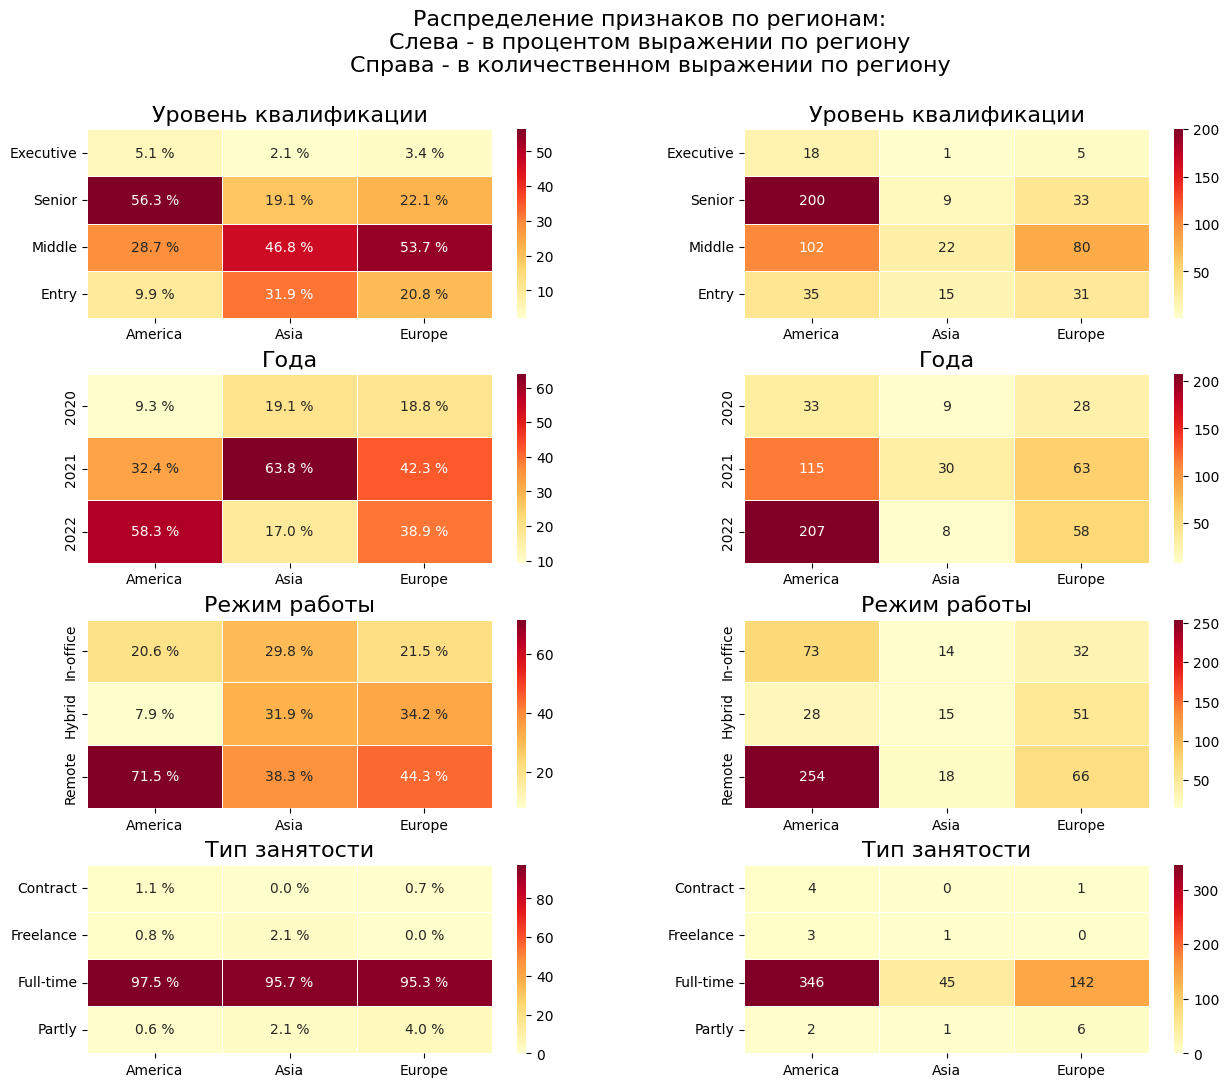

In [50]:
# Создаем DF только с регионами Америки, Европы, Азии
data_less_reg = data_easy_read.loc[
    (data_upd['company_location'] == 'America') |
    (data_upd['company_location'] == 'Europe') |
    (data_upd['company_location'] == 'Asia')
    ]

# Список признаков, распределение которых будем строить
feature_list = ['experience_level', 'work_year', 
                'remote_ratio', 'employment_type']

# Список признаков на русском для названий графиков
feature_list_rus = ['Уровень квалификации', 'Года', 
                'Режим работы', 'Тип занятости']

# Создаем subplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,12))
plt.subplots_adjust(hspace=0.3, wspace = 0.3)

# Счетчик - используем в цикле для идентификации итерации 
# Используется для нумерации subplot, идентификации номера 
# элемента в списке признаков на русском /
counter = 0

# Цикл для создания тепловых графиков
for elem in feature_list:
    
    # Создаем таблицу сопряженности для признаков из списка 
    # feature_list и региона, нормализуем по региону /
    data_normalised = pd.crosstab(
        index=data_less_reg[f'{elem}'],
        columns=data_less_reg['company_location'],
        normalize='columns'
        )

    # Приведем проценты к целочисленной форме шкалы 0-100 /
    data_normalised = data_normalised.apply(lambda x: x*100)

    # Для признака опыта работы поменяем индексы по возрастанию
    if counter == 0:
        new_index = ['Executive', 'Senior', 'Middle', 'Entry']
        data_normalised = data_normalised.reindex(new_index)
        
    # Создаем тепловую карту признаков, добавляем необходимые 
    # обозначения, знак процента к значениям в тепловой карте /
    heat_norm = sns.heatmap(
        data_normalised, 
        annot=True, 
        linewidth=.5, 
        fmt='.1f', 
        cmap="YlOrRd",
        ax=axes[counter][0]
        )

    heat_norm.set_xlabel('')
    heat_norm.set_ylabel('')
    for t in heat_norm.texts: t.set_text(t.get_text() + " %")

    heat_norm.set_title(
        f'{feature_list_rus[counter]}',
        fontsize = 16
        )

    # Создаем таблицу сопряженности для признаков из списка 
    # feature_list и региона, нормализуем не делаем /
    data_sum = pd.crosstab(
        index=data_less_reg[f'{elem}'],
        columns=data_less_reg['company_location']
        )
    
    # Для признака опыта работы поменяем индексы по возрастанию
    if counter == 0:
        new_index = ['Executive', 'Senior', 'Middle', 'Entry']
        data_sum = data_sum.reindex(new_index)

    # Создаем тепловую карту признаков, добавляем необходимые обозначения
    heat_sum = sns.heatmap(
        data_sum, 
        annot=True, 
        linewidth=.5, 
        fmt='.0f', 
        cmap="YlOrRd",
        ax=axes[counter][1]
        )
    heat_sum.set_xlabel('')
    heat_sum.set_ylabel('')
    heat_sum.set_title(
        f'{feature_list_rus[counter]}',
        fontsize = 16
        )

    counter += 1

# Создаем общий заголовок
plt.suptitle('Распределение признаков по регионам:' \
             '\n' 'Слева - в процентом выражении по региону' \
             '\n' 'Справа - в количественном выражении по региону',
            fontsize = 16
            )

plt.show('png')

Так же, дополнительно построим графики, иллюстрирующие динамику изменения уровня квалификации специалистов по регионам. 

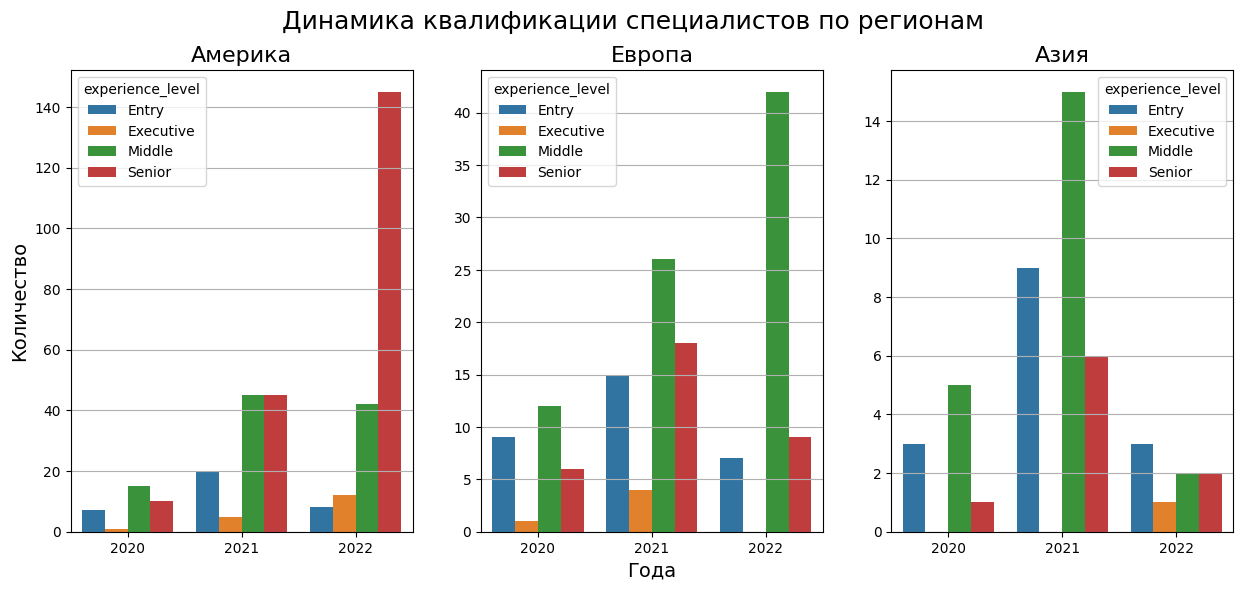

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

regions_list = ['America', 'Europe', 'Asia']
regions_rus_list = ['Америка', 'Европа', 'Азия']

counter = 0

for elem in regions_list:

    fig = sns.countplot(
        data = data_less_reg[
            data_less_reg['company_location'] == f'{elem}'
            ],
        x = 'work_year',
        hue= 'experience_level',
        ax=axes[counter]
        )
    
    if counter == 0:
        fig.set_ylabel('Количество', fontsize = 14)
    else:
        fig.set_ylabel('')
        
    if counter == 1:
        fig.set_xlabel('Года', fontsize = 14)
    else:
        fig.set_xlabel('')

    fig.set_title(f'{regions_rus_list[counter]}', fontsize = 16)
    fig.grid(axis='y')
    
    counter += 1

plt.suptitle(
    'Динамика квалификации специалистов по регионам',
    fontsize = 18
    )
plt.show('png')

**Промежуточный вывод:**

Действительно, по всем рассмотренным признакам, кроме типа занятости, в процентном выражении в компаниях Америки присутствует преобладание наиболее высокооплачиваемых признаков. 

Для дальнейшего изучения данного вопроса сравним зарплаты специалистов квалификации Senior. 

In [52]:
# Создаем объекты Series с зарплатами с фильтром по региону, 
# квалификации /
data_senior_am = data_less_reg.loc[
    (data_less_reg['company_location'] == 'America') &
    (data_less_reg['experience_level'] == 'Senior'),
    'salary_in_usd'
    ] 

data_senior_eu = data_less_reg.loc[
    (data_less_reg['company_location'] == 'Europe') &
    (data_less_reg['experience_level'] == 'Senior'),
    'salary_in_usd'
    ] 

data_senior_as = data_less_reg.loc[
    (data_less_reg['company_location'] == 'Asia') &
    (data_less_reg['experience_level'] == 'Senior'),
    'salary_in_usd'
    ] 

# Проводим проверку на нормальность, выводим результат
print('Распределение заработных плат компаний Америки')
result = stats.shapiro(data_senior_am)
decision_normality(result[1])

print('\nРаспределение заработных плат компаний Европы')
result = stats.shapiro(data_senior_eu)
decision_normality(result[1])

print('\nРаспределение заработных плат компаний Азии')
result = stats.shapiro(data_senior_as)
decision_normality(result[1])

Распределение заработных плат компаний Америки
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат компаний Европы
p-value = 0.027
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Распределение заработных плат компаний Азии
p-value = 0.151
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


#### Статистический тест для проверки равности зарплат Senior-специалистов в компаниях разных регионов

Для трех независимых групп не нормально распределенных данных для их сравнения используем критерий Краскела-Уоллиса.

**Сформируем гипотезы:**

*Нулевая гипотеза:* медианы зарплат в компаниях Америки, Европы и Азии **равны.** 
$$ H_0: m_1 = m_2 = m_3 $$

*Альтернативная гипотеза:* медианы зарплат в компаниях Америки, Европы и Азии **не равны.** 
$$ H_0: m_1 \neq m_2 \neq m_3 $$

In [53]:
# Проведем тест
_, p = stats.kruskal(
    data_senior_am, data_senior_eu, data_senior_as
    )
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


#### Статистический тест для проверки соотношения зарплат в компаниях разных регионов

Для двух независимых групп не нормально распределенных данных для их сравнения используем критерий Манна-Уитни. Проведем два теста. 

**Сформируем гипотезы:**

**Сравненение компаний Америки и Европы**

*Нулевая гипотеза:* зарплата Senior-специалистов, работающих в компаниях Америки **меньше или равна** зарплаты специалистов, работающих в компаниях Европы.  
$$ H_0: μ_1 <= μ_2 $$

*Альтернативная гипотеза:* зарплата Senior-специалистов, работающих в компаниях Америки **больше** зарплаты специалистов, работающих в компаниях Европы. 
$$ H_0: μ_1 > μ_2 $$

**Сравненение компаний Европы и Азии**

*Нулевая гипотеза:* зарплата Senior-специалистов, работающих в компаниях Европы **меньше или равна** зарплаты специалистов, работающих в компаниях Азии.  
$$ H_0: μ_1 <= μ_2 $$

*Альтернативная гипотеза:* зарплата Senior-специалистов, работающих в компаниях Европы **больше** зарплаты специалистов, работающих в компаниях Азии. 
$$ H_0: μ_1 > μ_2 $$

In [54]:
# Проведем тесты 
print('Сравненение компаний Америки и Европы')
_, p = stats.mannwhitneyu(
    data_senior_am, data_senior_eu, alternative='greater'
    )
decision_hypothesis(p)

print('\nСравненение компаний Европы и Азии')
_, p = stats.mannwhitneyu(
    data_senior_eu, data_senior_as, alternative='greater'
    )
decision_hypothesis(p)

Сравненение компаний Америки и Европы
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.

Сравненение компаний Европы и Азии
p-value = 0.334
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:**

Благодаря проведенным тестам мы можем утверждать, что зарплаты Senior специлистов выше в Америке, чем в других исследуемых регионах. 

___
### Вывод по исследованию: 

В ходе исследования мы выявили факторы, позитивно влияющие на размер заработных плат специалистов сферы Data Science. 

К таким факторам можно отнести: 
- Квалификация специалистов - прямая зависимость 
- Режим работы - наибольшие зарплаты при удаленном режиме работы 
- Тип занятости - полная занятость
- Регион нахождения компании и резиденства работников - Америка
- Год - 2022 
- Сфера деательности - Data Science и Data Engineering 
- Размер компании - средние и большие

При этом, важно отметить, что на основе приведенных данных можно сделать вывод, что сфера DS весьма стремительно развивается, с каждым годом становится все больше специалистов и возврастают зарплаты. Так же видно, что США производит большие денежные вливания в развитие данной сферы, в этой стране больше всего специлистов квалификации Senior, причем был виден резкий рост их количества в 2022 году, заработные платы так же существенно выше, чем в других регионах. 